# **A Comprehensive Analysis of Housing Prices and Classification Using Advanced Modeling Techniques**

**neccesary imports**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest

In [2]:
import numpy as np
np.random.seed(42)  # specific seed value

# **Data Preprocessing and loading**

In [3]:

# Load the dataset
df = pd.read_excel("Housing_data.xls")

# Handling Missing Data
missing_values = df.isnull().sum()
# Identify and assess missing values
print("Missing Values:\n", missing_values)

# Drop rows with missing values
df = df.dropna()

# Dealing with Outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset

# Explicitly set column names for IsolationForest
X_outlier = df[['SalePrice']]
outlier_labels = outlier_detector.fit_predict(X_outlier)
df = df[outlier_labels == 1]  # Keep only non-outliers

# Encoding Categorical Variables using One-Hot Encoding and Standardizing Numeric Variables
numeric_vars = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']
categorical_vars = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_vars),
        ('cat', OneHotEncoder(), categorical_vars)
    ])

# Scaling Numerical Features and Encoding Categorical Variables
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_preprocessed = preprocessor.fit_transform(X)

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Now, X_train, X_test, y_train, y_test are ready for model training and evaluation


FileNotFoundError: [Errno 2] No such file or directory: 'Housing_data.xls'

# **Regression Analysis**

**1. Baseline Model (Multiple Linear Regression)**

In [4]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Baseline Model (Multiple Linear Regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = baseline_model.predict(X_train)
# Predictions on the test set
y_test_pred = baseline_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Baseline Model Metrics:")
print(f"Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Train R-squared: {r2_train:.4f}, Test R-squared: {r2_test:.4f}")


Baseline Model Metrics:
Train MSE: 1389891828.59, Test MSE: 1235932954.25
Train R-squared: 0.6007, Test R-squared: 0.6761


**2. Stepwise Selection:**

***a. Forward Stepwise Selection Model Metrics***

In [6]:
from sklearn.feature_selection import f_regression
import numpy as np

# Feature selection using f_regression (for simplicity)
f_values, p_values = f_regression(X_train, y_train)

# Feature indices sorted by p-values for Forward Stepwise Selection
forward_selected_features = [i for i, p in sorted(enumerate(p_values), key=lambda x: x[1])]

# Select top k features (adjust k based on your analysis)
k = 5
forward_selected_features = forward_selected_features[:k]

# Train a model with selected features for Forward Stepwise Selection
forward_stepwise_model = LinearRegression()
forward_stepwise_model.fit(X_train[:, forward_selected_features], y_train)

# Predictions on the training set
y_train_forward_stepwise_pred = forward_stepwise_model.predict(X_train[:, forward_selected_features])
# Predictions on the test set
y_test_forward_stepwise_pred = forward_stepwise_model.predict(X_test[:, forward_selected_features])

# Compare Forward Stepwise Selection model
mse_train_forward_stepwise = mean_squared_error(y_train, y_train_forward_stepwise_pred)
mse_test_forward_stepwise = mean_squared_error(y_test, y_test_forward_stepwise_pred)
r2_train_forward_stepwise = r2_score(y_train, y_train_forward_stepwise_pred)
r2_test_forward_stepwise = r2_score(y_test, y_test_forward_stepwise_pred)

print("\nForward Stepwise Selection Model Metrics:")
print(f"Train MSE: {mse_train_forward_stepwise:.2f}, Test MSE: {mse_test_forward_stepwise:.2f}")
print(f"Train R-squared: {r2_train_forward_stepwise:.4f}, Test R-squared: {r2_test_forward_stepwise:.4f}")


Forward Stepwise Selection Model Metrics:
Train MSE: 1803959622.42, Test MSE: 1588547777.32
Train R-squared: 0.4817, Test R-squared: 0.5837


***b. Backward Stepwise Selection Model Metrics***

In [7]:
# Feature indices sorted by p-values for Backward Stepwise Selection
backward_selected_features = list(range(X_train.shape[1]))  # Initialize with all features

# Select top k features (adjust k based on your analysis)
k = 5
backward_selected_features = backward_selected_features[:k]

# Train a model with selected features for Backward Stepwise Selection
backward_stepwise_model = LinearRegression()
backward_stepwise_model.fit(X_train[:, backward_selected_features], y_train)

# Predictions on the training set
y_train_backward_stepwise_pred = backward_stepwise_model.predict(X_train[:, backward_selected_features])
# Predictions on the test set
y_test_backward_stepwise_pred = backward_stepwise_model.predict(X_test[:, backward_selected_features])

# Compare Backward Stepwise Selection model
mse_train_backward_stepwise = mean_squared_error(y_train, y_train_backward_stepwise_pred)
mse_test_backward_stepwise = mean_squared_error(y_test, y_test_backward_stepwise_pred)
r2_train_backward_stepwise = r2_score(y_train, y_train_backward_stepwise_pred)
r2_test_backward_stepwise = r2_score(y_test, y_test_backward_stepwise_pred)

print("\nBackward Stepwise Selection Model Metrics:")
print(f"Train MSE: {mse_train_backward_stepwise:.2f}, Test MSE: {mse_test_backward_stepwise:.2f}")
print(f"Train R-squared: {r2_train_backward_stepwise:.4f}, Test R-squared: {r2_test_backward_stepwise:.4f}")


Backward Stepwise Selection Model Metrics:
Train MSE: 2031457787.00, Test MSE: 2038055571.58
Train R-squared: 0.4163, Test R-squared: 0.4658


**3. PCA (Principal Component Analysis)**

In [8]:
from sklearn.decomposition import PCA
from scipy.sparse import issparse

# Check if X_train is sparse
if issparse(X_train):
    # If sparse, convert to dense array
    X_train = X_train.toarray()

# Choose the number of components
n_components = 5

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("\nPCA Explained Variance Ratio:")
print(explained_variance_ratio)
print(f"Total Explained Variance: {sum(explained_variance_ratio):.4f}")



PCA Explained Variance Ratio:
[0.23324534 0.16683072 0.12013793 0.10849728 0.10041624]
Total Explained Variance: 0.7291


**4. Higher-Order Regression**:

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
#desired degree
degree = 2

# the alpha parameter for Ridge Regression
alpha = 1.0

# Create a pipeline for Polynomial Regression with Ridge regularization
poly_model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
poly_model_ridge.fit(X_train, y_train)  # we take X_train and y_train as our training features and target variable

# Predictions on the training set
y_train_poly_ridge_pred = poly_model_ridge.predict(X_train)
# Predictions on the test set
y_test_poly_ridge_pred = poly_model_ridge.predict(X_test)

# Evaluate the Polynomial Regression with Ridge model
mse_train_poly_ridge = mean_squared_error(y_train, y_train_poly_ridge_pred)
mse_test_poly_ridge = mean_squared_error(y_test, y_test_poly_ridge_pred)
r2_train_poly_ridge = r2_score(y_train, y_train_poly_ridge_pred)
r2_test_poly_ridge = r2_score(y_test, y_test_poly_ridge_pred)

print("\nPolynomial Regression with Ridge Model Metrics:")
print(f"Train MSE: {mse_train_poly_ridge:.2f}, Test MSE: {mse_test_poly_ridge:.2f}")
print(f"Train R-squared: {r2_train_poly_ridge:.4f}, Test R-squared: {r2_test_poly_ridge:.4f}")



Polynomial Regression with Ridge Model Metrics:
Train MSE: 610745448.82, Test MSE: 1102333662.32
Train R-squared: 0.8245, Test R-squared: 0.7111


**f. Visualization:**

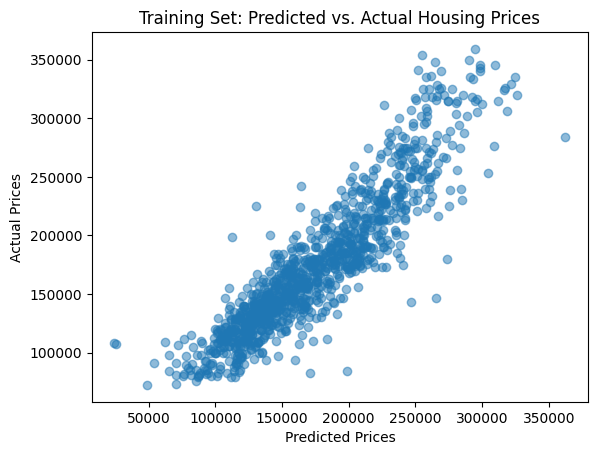

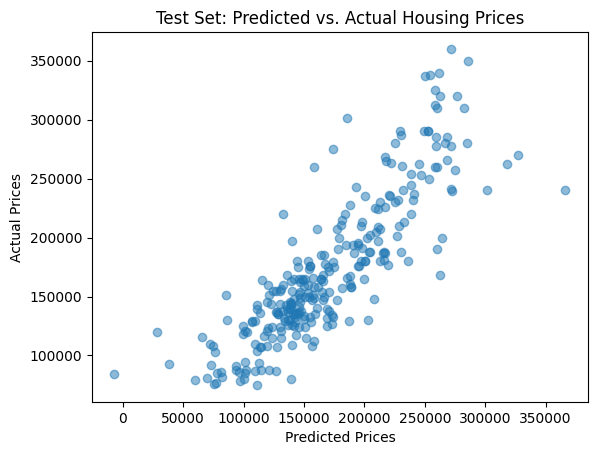

In [10]:
import matplotlib.pyplot as plt

# Scatter plot for training set
plt.scatter(y_train_poly_ridge_pred, y_train, alpha=0.5)
plt.title("Training Set: Predicted vs. Actual Housing Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.show()

# Scatter plot for test set
plt.scatter(y_test_poly_ridge_pred, y_test, alpha=0.5)
plt.title("Test Set: Predicted vs. Actual Housing Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.show()


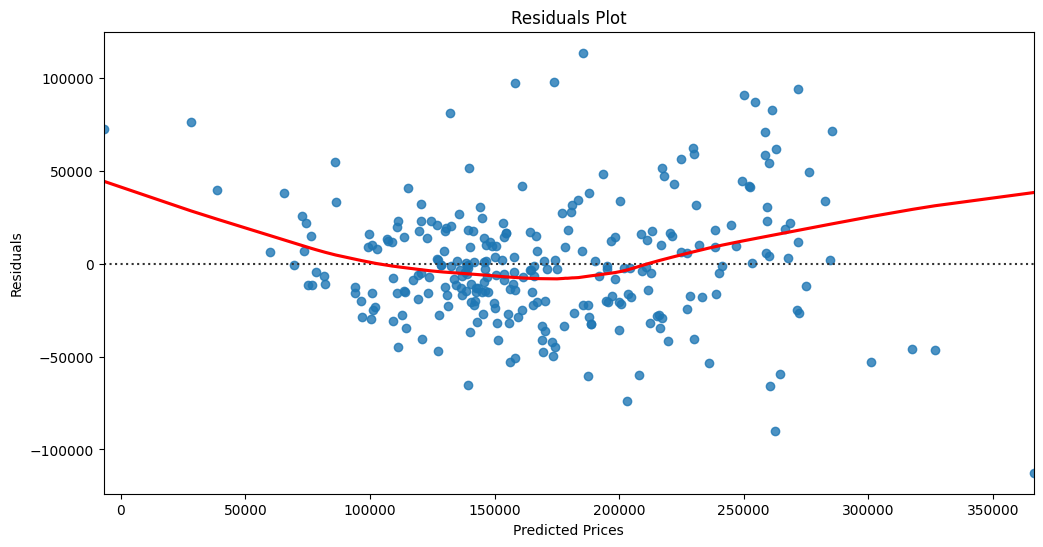

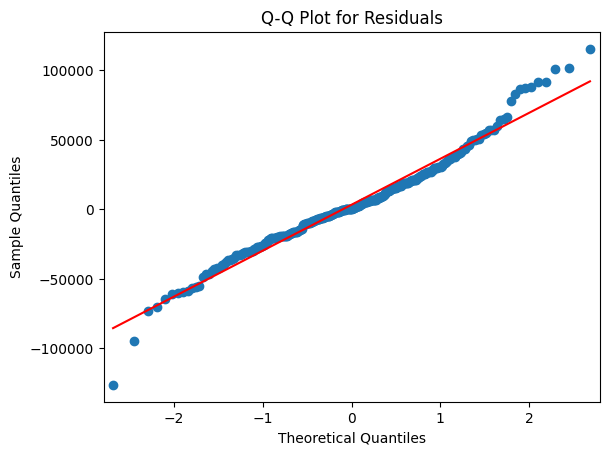

In [11]:
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence

# Residuals plot
residuals = y_test - y_test_poly_ridge_pred
plt.figure(figsize=(12, 6))
sns.residplot(x=y_test_poly_ridge_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

# Q-Q plot for residuals
qqplot(residuals, line='s')
plt.title("Q-Q Plot for Residuals")
plt.show()


**Explore and implement advanced regression techniques, such as ridge regression, lasso regression, and compare their performance**

***Application of Ridge Regression:***

In [12]:
from sklearn.linear_model import Ridge

# Choose the alpha parameter for Ridge Regression based on your analysis
alpha_ridge = 1.0

# Create and fit Ridge Regression model
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)

# Evaluate Ridge Regression model
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

# Calculate metrics for Ridge Regression
mse_train_ridge = mean_squared_error(y_train, ridge_train_pred)
mse_test_ridge = mean_squared_error(y_test, ridge_test_pred)
r2_train_ridge = r2_score(y_train, ridge_train_pred)
r2_test_ridge = r2_score(y_test, ridge_test_pred)


***Application of Lasso Regression:***

In [13]:
from sklearn.linear_model import Lasso

# Choose the alpha parameter for Lasso Regression based on your analysis
alpha_lasso = 0.01

# Create and fit Lasso Regression model
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train, y_train)

# Evaluate Lasso Regression model
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

# Calculate metrics for Lasso Regression
mse_train_lasso = mean_squared_error(y_train, lasso_train_pred)
mse_test_lasso = mean_squared_error(y_test, lasso_test_pred)
r2_train_lasso = r2_score(y_train, lasso_train_pred)
r2_test_lasso = r2_score(y_test, lasso_test_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.267e+09, tolerance: 3.860e+08
  model = cd_fast.enet_coordinate_descent(


***Performance Comparison with the Baseline***

In [14]:
# Metrics for Baseline (Polynomial Regression with Ridge)
print("\nBaseline Model Metrics:")
print(f"Train MSE: {mse_train_poly_ridge:.2f}, Test MSE: {mse_test_poly_ridge:.2f}")
print(f"Train R-squared: {r2_train_poly_ridge:.4f}, Test R-squared: {r2_test_poly_ridge:.4f}")

# Metrics for Ridge Regression
print("\nRidge Regression Model Metrics:")
print(f"Train MSE: {mse_train_ridge:.2f}, Test MSE: {mse_test_ridge:.2f}")
print(f"Train R-squared: {r2_train_ridge:.4f}, Test R-squared: {r2_test_ridge:.4f}")

# Metrics for Lasso Regression
print("\nLasso Regression Model Metrics:")
print(f"Train MSE: {mse_train_lasso:.2f}, Test MSE: {mse_test_lasso:.2f}")
print(f"Train R-squared: {r2_train_lasso:.4f}, Test R-squared: {r2_test_lasso:.4f}")



Baseline Model Metrics:
Train MSE: 610745448.82, Test MSE: 1102333662.32
Train R-squared: 0.8245, Test R-squared: 0.7111

Ridge Regression Model Metrics:
Train MSE: 1391480995.46, Test MSE: 1240561053.46
Train R-squared: 0.6002, Test R-squared: 0.6749

Lasso Regression Model Metrics:
Train MSE: 1389891828.96, Test MSE: 1236938348.93
Train R-squared: 0.6007, Test R-squared: 0.6758


# **5. Classification Analysis:**

In [16]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

**b. Baseline Model (Logistic Regression):**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and fit Logistic Regression baseline model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_class)  # y_train_class represents the categorical target variable

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate classification metrics
accuracy_logistic = accuracy_score(y_test_class, y_pred_logistic)
precision_logistic = precision_score(y_test_class, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test_class, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test_class, y_pred_logistic, average='weighted')

# Display classification metrics
print("Logistic Regression Baseline Metrics:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1 Score: {f1_logistic:.4f}")
print('\n')


Logistic Regression Baseline Metrics:
Accuracy: 0.0108
Precision: 0.0030
Recall: 0.0108
F1 Score: 0.0045




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_

**c. Dimensionality Reduction:**

In [18]:
from sklearn.decomposition import TruncatedSVD

# number of components based on your analysis
n_components_svd = 5

# Create and fit TruncatedSVD model for dimensionality reduction
svd = TruncatedSVD(n_components=n_components_svd)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)


**d. Tree-Based Model (Random forests)**

Implement a tree-based classifica<on model (e.g., decision trees, random
forests) and compare its performance with the logis<c regression baseline

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    # Add more parameters to tune as needed
}

# Create and fit Random Forest model with hyperparameter tuning
rf_model_tuned = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
rf_model_tuned.fit(X_train, y_train_class)

# Make predictions on the test set
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Calculate classification metrics for tuned Random Forest
accuracy_rf_tuned = accuracy_score(y_test_class, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test_class, y_pred_rf_tuned, average='weighted')
recall_rf_tuned = recall_score(y_test_class, y_pred_rf_tuned, average='weighted')
f1_rf_tuned = f1_score(y_test_class, y_pred_rf_tuned, average='weighted')

# Display classification metrics for tuned Random Forest
print("Tuned Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Precision: {precision_rf_tuned:.4f}")
print(f"Recall: {recall_rf_tuned:.4f}")
print(f"F1 Score: {f1_rf_tuned:.4f}")
print("\n")

# Compare with Logistic Regression baseline
print("\nComparison with Logistic Regression:")
print(f"Accuracy Improvement: {accuracy_rf_tuned - accuracy_logistic:.4f}")
print(f"Precision Improvement: {precision_rf_tuned - precision_logistic:.4f}")
print(f"Recall Improvement: {recall_rf_tuned - recall_logistic:.4f}")
print(f"F1 Score Improvement: {f1_rf_tuned - f1_logistic:.4f}")
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Tuned Random Forest Metrics:
Accuracy: 0.0072
Precision: 0.0058
Recall: 0.0072
F1 Score: 0.0063



Comparison with Logistic Regression:
Accuracy Improvement: -0.0036
Precision Improvement: 0.0027
Recall Improvement: -0.0036
F1 Score Improvement: 0.0018




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**e. Visualization   to illustrate the separa<on between different classes in the feature space**

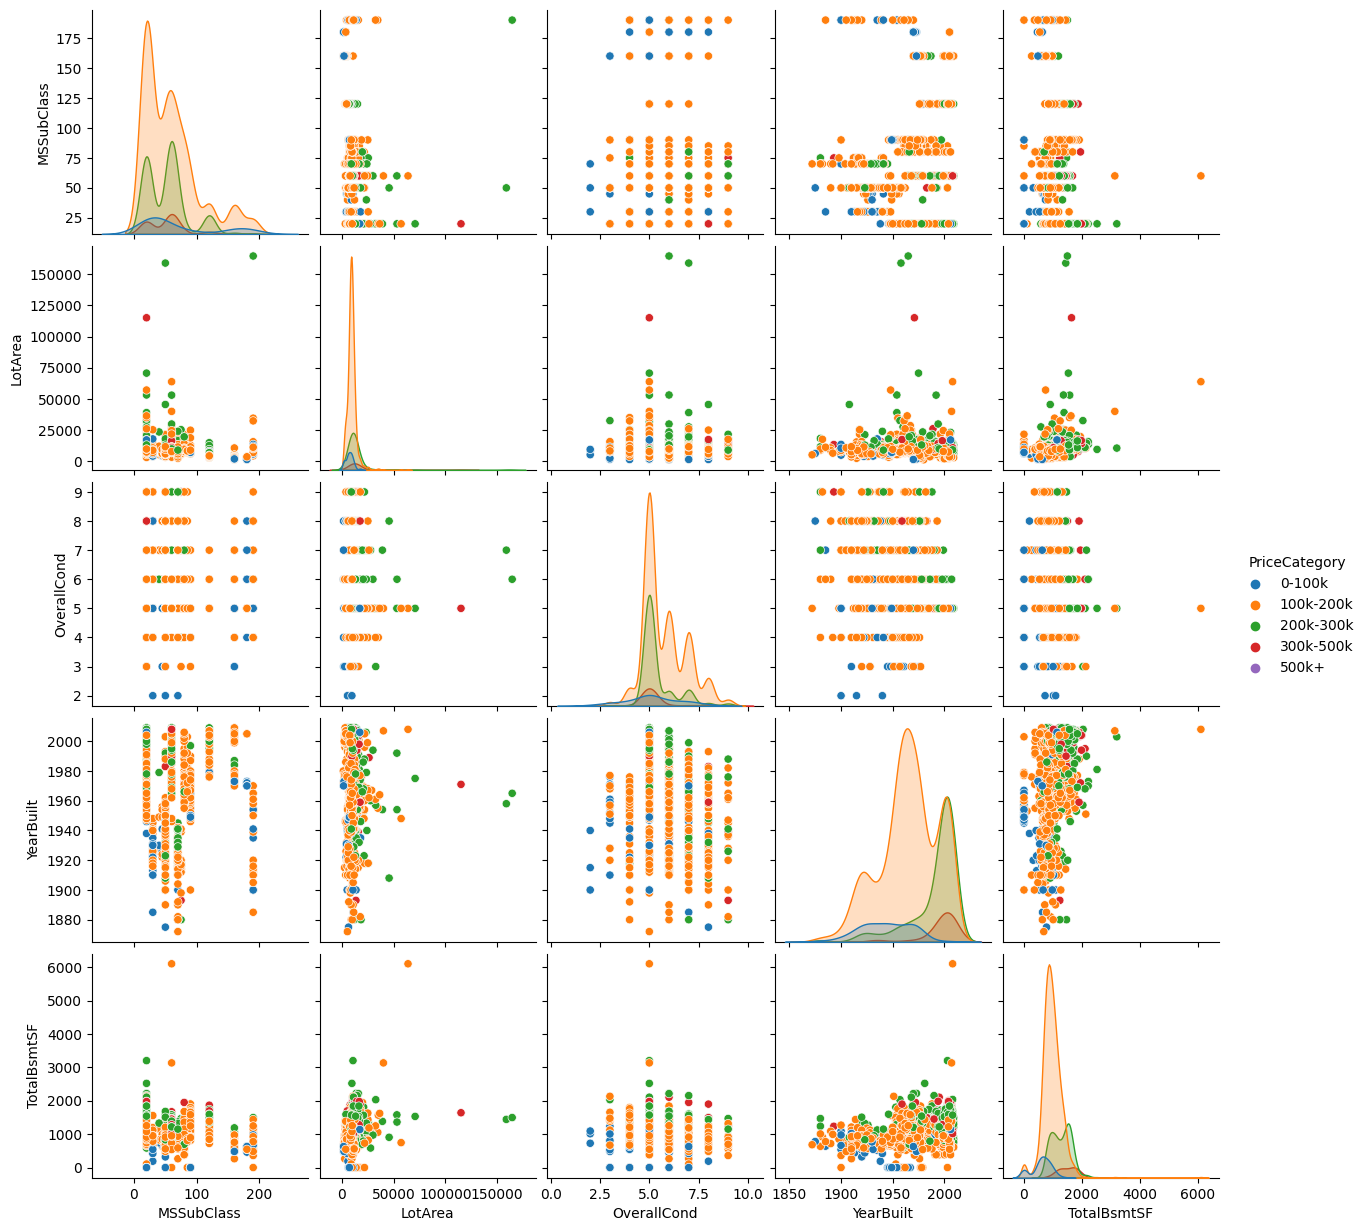

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Pair plot for selected features
selected_features = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[0, 100000, 200000, 300000, 500000, np.inf], labels=['0-100k', '100k-200k', '200k-300k', '300k-500k', '500k+'])
sns.pairplot(data=df, hue='PriceCategory', vars=selected_features)
plt.show()


# **Explore and implement one advanced classifica<on technique such as knnearest neighbors, naive Bayes, etc. Compare their performance with the  baseline**

**Implementation of k-Nearest Neighbors (k-NN):**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and fit k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_class)  # Assuming y_train_class is the categorical target variable

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate classification metrics for k-NN
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
precision_knn = precision_score(y_test_class, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test_class, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_class, y_pred_knn, average='weighted')

# Display classification metrics for k-NN
print("k-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


k-Nearest Neighbors Metrics:
Accuracy: 0.0108
Precision: 0.0059
Recall: 0.0108
F1 Score: 0.0070


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Performance Comparison:**

In [ ]:
# Display classification metrics for Logistic Regression (baseline)
print("Logistic Regression Baseline Metrics:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1 Score: {f1_logistic:.4f}")
print('\n')

# Display classification metrics for k-NN
print("k-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print('\n')

# Compare with k-NN
print("\nComparison with k-Nearest Neighbors:")
print(f"Accuracy Improvement: {accuracy_knn - accuracy_logistic:.4f}")
print(f"Precision Improvement: {precision_knn - precision_logistic:.4f}")
print(f"Recall Improvement: {recall_knn - recall_logistic:.4f}")
print(f"F1 Score Improvement: {f1_knn - f1_logistic:.4f}")


Logistic Regression Baseline Metrics:
Accuracy: 0.0108
Precision: 0.0030
Recall: 0.0108
F1 Score: 0.0045


k-Nearest Neighbors Metrics:
Accuracy: 0.0108
Precision: 0.0059
Recall: 0.0108
F1 Score: 0.0070



Comparison with k-Nearest Neighbors:
Accuracy Improvement: 0.0000
Precision Improvement: 0.0029
Recall Improvement: 0.0000
F1 Score Improvement: 0.0025
